In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/new_data_tech_layoffs.csv')

# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_id                       1410 non-null   int64  
 1   Company                      1410 non-null   object 
 2   email                        1410 non-null   object 
 3   website                      1410 non-null   object 
 4   Location_HQ                  1410 non-null   object 
 5   Country                      1410 non-null   object 
 6   Continent                    1410 non-null   object 
 7   Laid_Off                     1410 non-null   int64  
 8   Date_layoffs                 1410 non-null   object 
 9   Percentage                   1410 non-null   float64
 10  Company_Size_before_Layoffs  1410 non-null   int64  
 11  Company_Size_after_layoffs   1410 non-null   int64  
 12  Industry                     1410 non-null   object 
 13  Stage             

### **Trực quan hóa dữ liệu**

In [22]:
df2 = pd.read_csv('/content/new_data_tech_layoffs.csv')

In [24]:
df2.head()

,new_id,Company,email,website,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1,ShareChat,sharechat@mail.com,www.sharechat.biz,Bengaluru,India,Asia,200,2023-12-20 00:00:00 UTC,15.0,1333,1133,Consumer,Series H,1700.0,2023,12.97194,77.59369
1,2,InSightec,insightec@aol.com,www.insightec.co,Haifa,Israel,Asia,100,2023-12-19 00:00:00 UTC,20.0,500,400,Healthcare,Unknown,733.0,2023,32.81841,34.98850
2,3,Enphase Energy,enphaseenergy@gmail.com,www.enphaseenergy.org,San Francisco Bay Area,USA,North America,350,2023-12-18 00:00:00 UTC,10.0,3500,3150,Energy,Post-IPO,116.0,2023,37.54827,-121.98857
3,4,Udaan,udaan@yahoo.com,www.udaan.com,Bengaluru,India,Asia,100,2023-12-18 00:00:00 UTC,10.0,1000,900,Retail,Unknown,1500.0,2023,12.97194,77.59369
4,5,Cruise,cruise@mail.com,www.cruise.io,San Francisco Bay Area,USA,North America,900,2023-12-14 00:00:00 UTC,24.0,3750,2850,Transportation,Acquired,15000.0,2023,37.77493,-122.41942


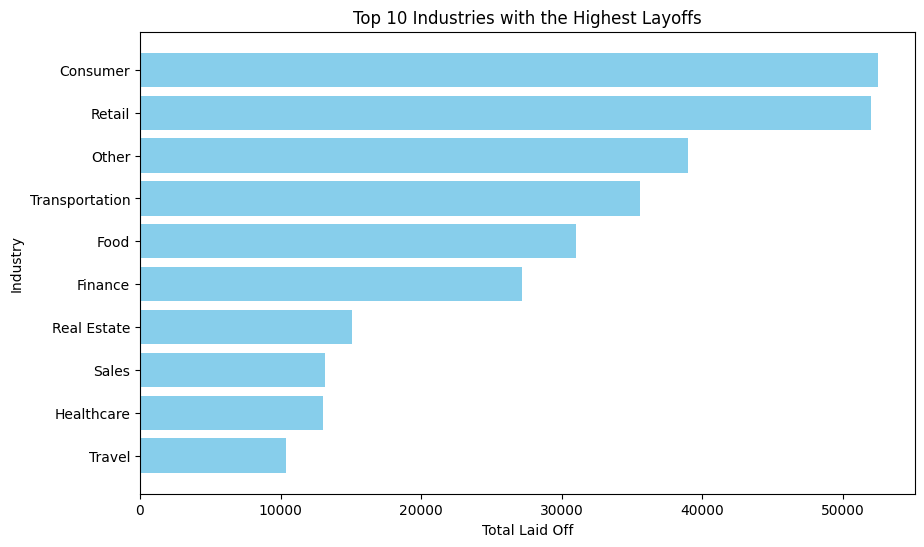

In [26]:
# Tính tổng số lượng sa thải theo từng ngành
layoffs_by_industry = df2.groupby('Industry')['Laid_Off'].sum().reset_index()
layoffs_by_industry.columns = ['Industry', 'Total_Laid_Off']

# Sắp xếp các ngành theo số lượng sa thải giảm dần
layoffs_by_industry = layoffs_by_industry.sort_values(by='Total_Laid_Off', ascending=False)

# Lấy ra 10 ngành có số lượng sa thải lớn nhất
top_10_industries = layoffs_by_industry.head(10)

# Hiển thị kết quả bằng biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(top_10_industries['Industry'], top_10_industries['Total_Laid_Off'], color='skyblue')
plt.xlabel('Total Laid Off')
plt.ylabel('Industry')
plt.title('Top 10 Industries with the Highest Layoffs')
plt.gca().invert_yaxis() # Để hiển thị ngành có số lượng sa thải lớn nhất ở trên cùng
plt.show()

### **Tiền xử lý dữ liệu**

In [3]:
# Loại bỏ cột không cần thiết
df.drop(columns=['new_id', 'Date_layoffs', 'Continent', 'Company_Size_after_layoffs', 'Laid_Off', 'email', 'website', 'lat', 'lng'], inplace=True)

In [4]:
df.head()

,Company,Location_HQ,Country,Percentage,Company_Size_before_Layoffs,Industry,Stage,Money_Raised_in_$_mil,Year
0,ShareChat,Bengaluru,India,15.0,1333,Consumer,Series H,1700.0,2023
1,InSightec,Haifa,Israel,20.0,500,Healthcare,Unknown,733.0,2023
2,Enphase Energy,San Francisco Bay Area,USA,10.0,3500,Energy,Post-IPO,116.0,2023
3,Udaan,Bengaluru,India,10.0,1000,Retail,Unknown,1500.0,2023
4,Cruise,San Francisco Bay Area,USA,24.0,3750,Transportation,Acquired,15000.0,2023


In [5]:
# Chuyển đổi các biến phân loại thành số
label_encoders = {}
categorical_columns = [ 'Location_HQ', 'Country', 'Industry', 'Stage']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
df.head()

,Company,Location_HQ,Country,Percentage,Company_Size_before_Layoffs,Industry,Stage,Money_Raised_in_$_mil,Year
0,ShareChat,12,13,15.0,1333,3,11,1700.0,2023
1,InSightec,47,16,20.0,500,13,15,733.0,2023
2,Enphase Energy,102,34,10.0,3500,7,1,116.0,2023
3,Udaan,12,13,10.0,1000,24,15,1500.0,2023
4,Cruise,102,34,24.0,3750,28,0,15000.0,2023


In [7]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(columns=['Company', 'Percentage'])  # Loại bỏ cột Company và Percentage
y = df['Percentage']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,Location_HQ,Country,Company_Size_before_Layoffs,Industry,Stage,Money_Raised_in_$_mil,Year
1034,115,31,1000,19,1,275.0,2022
579,48,11,313,20,15,28.0,2022
1138,102,34,650,27,7,240.0,2020
48,102,34,233,8,5,123.0,2023
155,102,34,833,13,1,1100.0,2023


In [10]:
y_train.head()

1034    10.0
579     16.0
1138     6.0
48      12.0
155      9.0
Name: Percentage, dtype: float64

### **Thuật toán Random Forest**

In [11]:
# Tìm ra siêu tham số cho mô hình
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình
rf = RandomForestRegressor()

# Thiết lập các giá trị tham số cần thử nghiệm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Thực hiện tìm kiếm
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)

# Sử dụng mô hình với các tham số tốt nhất
best_rf = grid_search.best_estimator_

# model_rf = RandomForestRegressor(random_state=42)
# model_rf.fit(X_train, y_train)

In [14]:
# Dự đoán trên tập kiểm tra
# y_pred_rf = model_rf.predict(X_test)
y_pred = best_rf.predict(X_test)
# Hiển thị một vài giá trị thực tế và dự đoán để so sánh
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_rf.head())

      Actual  Predicted
353     25.0  31.118480
864      6.0  19.194351
1311    25.0  25.063755
192     25.0  13.908445
782      5.0  11.721614


In [15]:
# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Random Forest - Mean Squared Error: {mse_rf}')

# Tính RMSE
rmse = np.sqrt(mse_rf)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 10.266441939790683
Random Forest - Mean Squared Error: 234.36118050570386
Root Mean Squared Error (RMSE): 15.308859542947797


In [20]:
# Lấy chỉ các dòng tương ứng với tập kiểm tra từ DataFrame gốc
company_test = df.loc[X_test.index, 'Company']
industry_test = df.loc[X_test.index, 'Industry']
# Tạo DataFrame mới từ cột 'Company' và các dự đoán
result_df = pd.DataFrame({
    'Company': company_test,
    'Industry': industry_test,
    'Actual': y_test,
    'Predicted': y_pred
})

# In ra vài dòng đầu của DataFrame mới
result_df.head(20)


,Company,Industry,Actual,Predicted
353,Pocket Aces,19,25.000000,31.118480
864,Teleport,14,6.000000,19.194351
1311,eGym,9,25.000000,25.063755
192,Twist Bioscience,13,25.000000,13.908445
782,Outreach,25,5.000000,11.721614
529,Netlify,21,16.000000,17.861550
261,Slite,20,25.000000,41.882492
67,Nexar,28,14.000000,30.609151
1063,Dropbox,20,15.000000,19.488958
51,Dunzo,10,30.000000,20.000564


In [17]:
# Tính cột sai số (chênh lệch giữa giá trị thực tế và giá trị dự đoán)
result_df['Error'] = abs(result_df['Actual'] - result_df['Predicted'])

# Lọc ra các dòng có sai số trong khoảng từ 15 đến 30
filtered_errors = result_df[(result_df['Error'] >= 3) & (result_df['Error'] <= 15)]

# Lấy ra 10 dòng ngẫu nhiên từ các dòng đã lọc
random_10_errors = filtered_errors.sample(n=10, random_state=42)

# In ra 10 dòng có sai số trong khoảng từ 15 đến 30
print(random_10_errors)


           Company  Industry     Actual  Predicted      Error
1399     Instagram         3  13.333333  24.625520  11.292186
1167        Airbnb        29  25.000000  15.675650   9.324350
270         Symend        20  25.000000  31.189971   6.189971
1368   GoSpotCheck        24  20.000000  31.991448  11.991448
677       BioMarin        13   4.000000  10.950466   6.950466
76          Veriff        26  21.000000  15.496371   5.503629
1343     FabHotels        29  20.000000  30.656257  10.656257
259   Lucid Motors        28  18.000000  11.203424   6.796576
203       TheSkimm        19  13.000000  19.121786   6.121786
493      Outschool         6  25.000000  21.979231   3.020769


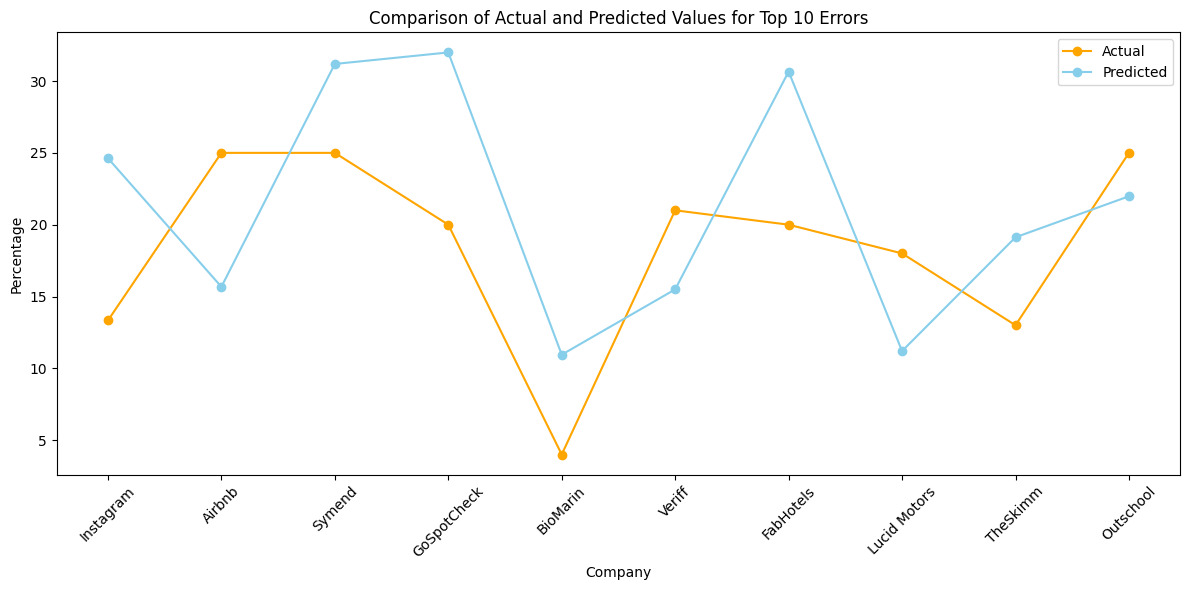

In [18]:
import matplotlib.pyplot as plt

# Chọn màu sắc cho đường thực tế và dự đoán
actual_color = 'orange'
predicted_color = 'skyblue'

# Tạo biểu đồ dạng đường
plt.figure(figsize=(12, 6))

# Vẽ đường thực tế
plt.plot(random_10_errors['Company'], random_10_errors['Actual'], marker='o', linestyle='-', color=actual_color, label='Actual')

# Vẽ đường dự đoán
plt.plot(random_10_errors['Company'], random_10_errors['Predicted'], marker='o', linestyle='-', color=predicted_color, label='Predicted')

# Đặt tiêu đề và nhãn trục
plt.title('Comparison of Actual and Predicted Values for Top 10 Errors')
plt.xlabel('Company')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
